In [1]:
import numpy as np
from environment import MazeEnv
from model import Model
from algorithm import NEXT_plan, RRTS_plan
from utils import set_random_seed, load_model, plot_tree

In [2]:
set_random_seed(1234)
cuda = True

# 2D Planning

In [3]:
dim = 2
UCB_type = 'kde'
environment = MazeEnv(dim = dim)
model = Model(cuda = cuda, dim = dim)
#model_file = 'trained_models/NEXT_%dd.pt' % dim
model_file = 'trained_models/MSIL_2d_final.pt'
load_model(model.net, model_file, cuda)

Initializing environment...
loading mazes from maze_files/mazes_15_2_3000.npz
initializing model ...
dim ==  2


In [4]:
# Sample a problem from the environment
pb_idx = 2101 # 0 - 2999
pb = environment.init_new_problem(pb_idx)
model.set_problem(pb)

## NEXT Algorithm

success = False    number of samples = 499


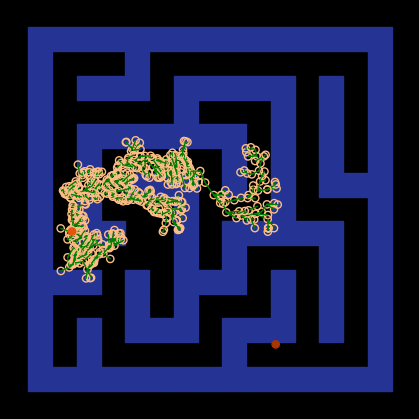

In [5]:
search_tree, done = NEXT_plan(
    env = environment,
    model = model,
    T = 500,
    g_explore_eps = 0.1,
    stop_when_success = True,
    UCB_type = UCB_type
)
plot_tree(
    states = search_tree.states,
    parents = search_tree.parents,
    problem = environment.get_problem()
)

## RRT* Algorithm

success = False    number of samples = 999


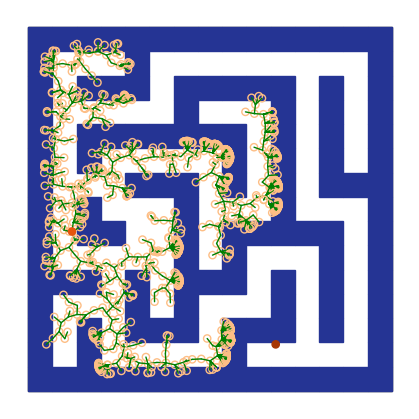

In [9]:
search_tree, done = RRTS_plan(
    env = environment,
    T = 1000,
    stop_when_success = True
)
plot_tree(
    states = search_tree.states,
    parents = search_tree.parents,
    problem = environment.get_problem()
)

# 3D Planning

In [7]:
dim = 3
UCB_type = 'kde'
environment = MazeEnv(dim = dim)
model = Model(cuda = cuda, dim = dim)
model_file = 'trained_models/NEXT_%dd.pt' % dim
load_model(model.net, model_file, cuda)

Initializing environment...
loading mazes from maze_files/mazes_15_3_3000.npz
initializing model ...
dim ==  3


In [8]:
# Sample a problem from the environment
pb_idx = 2101 # 0 - 2999
pb = environment.init_new_problem(pb_idx)
model.set_problem(pb)

## NEXT Algorithm

success = True    number of samples = 126


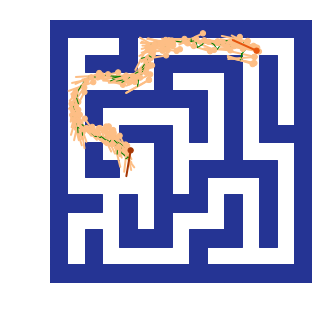

In [9]:
search_tree, done = NEXT_plan(
    env = environment,
    model = model,
    T = 500,
    g_explore_eps = 0.1,
    stop_when_success = True,
    UCB_type = UCB_type
)
plot_tree(
    states = search_tree.states,
    parents = search_tree.parents,
    problem = environment.get_problem()
)

## RRT* Algorithm

success = False    number of samples = 1999


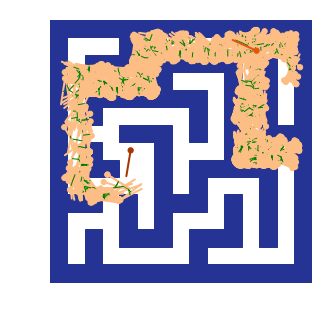

In [10]:
search_tree, done = RRTS_plan(
    env = environment,
    T = 2000,
    stop_when_success = True
)
plot_tree(
    states = search_tree.states,
    parents = search_tree.parents,
    problem = environment.get_problem()
)